# Analysis of "The Market"

Typically whenever someone talks about beating "the market" they are talking about an index. The most common indices you may hear mentioned are the S&P500, NASDAQ, and the Dow Jones Industrial. These indices are a basket of stocks created upon different definitions. Those indices can be bought through exchange traded funds (ETFs) are known by their tickers "SPY", "QQQ", and "DIA". Since these are ETFs and not the true indices themselves they may differ slightly from the actual index they are mimicking. This analysis will focus on the SPY and DIA as they are more commonly know.

- SPY: The SPDR S&P 500 ETF is the largest ETF tracking the S&P 500. Coincidentally, as the name implies, the S&P500 is comprised of 500 companies. The index is constructed using a weighted average market capitalization, which means larger companies have a greater weighting in the index. 


- DIA: The Dow Jones Industrial Average is comprised of 30 companies selected by a committee of Wall Street Journal editors.The only selection "rule" is companies must be substantial enterprises that represent a significant portion of the economic activity in the U.S. The Dow Jones Industrial Average is the 2nd oldest index dating back to 1896. The Dow Jones is a price-weighted index, meaning its value is derived from the price per share for each stock divided by a common divisor.


# Load Data into Dataframes and modify

In [1]:
from formulas import *
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Read data in to dataframes
spy = pd.read_csv('etfs/SPY.csv')
dia = pd.read_csv('etfs/DIA.csv')
qqq = pd.read_csv('etfs/QQQ.csv')


# Change date column to datetime type
spy['Date'] = pd.to_datetime(spy['Date'])
dia['Date'] = pd.to_datetime(dia['Date'])
qqq['Date'] = pd.to_datetime(qqq['Date'])

# View amount of daily data
print(f'There are {spy.shape[0]} rows in SPY and {dia.shape[0]} DIA rows')
print('*'*100)
print(f'''The date range of SPY is {spy.index.min()} to {spy.index.max()} 
       \n DIA is {dia.index.values.min()} to {dia.index.max()}
       \n QQQ is {qqq.index.min()} to {qqq.index.max()}''')

There are 6843 rows in SPY and 5587 DIA rows
****************************************************************************************************
The date range of SPY is 0 to 6842 
       
 DIA is 0 to 5586
       
 QQQ is 0 to 5300


Text(0.5, 1.0, 'SPY Daily Adjust Close Price')

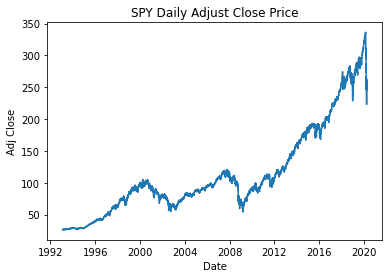

In [3]:
# Plot history of adjusted close price of SPY
sns.lineplot(x = spy.Date, y=spy['Adj Close'])
plt.title('SPY Daily Adjust Close Price')

Text(0.5, 1.0, 'DIA Daily Adjust Close Price')

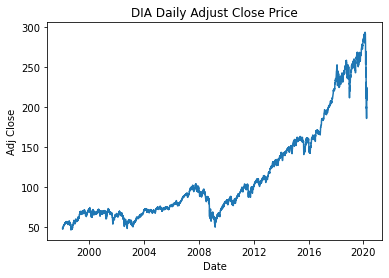

In [4]:
# Plot history of adjusted close price of SPY
sns.lineplot(x = dia.Date, y=dia['Adj Close'])
plt.title('DIA Daily Adjust Close Price')

### Exclude 2020 Data
For this excersise, and probably this entire project, we will only be using data up until Dec 31, 2019. This will give us a good complete yearly picture since we are not yet done with 2020.

In [5]:
# Edit spy dataframe taking out all 2020 points
spy = spy.loc[spy.Date.dt.year < 2020]

# Edit dia dataframe taking out all 2020 points
dia = dia.loc[dia.Date.dt.year < 2020]

# Edit dia dataframe taking out all 2020 points
qqq = qqq.loc[qqq.Date.dt.year < 2020]

### Calculate Returns and View Distributions

It is better to make predictions of returns versus stock price. This is because a 2% gain on a 100 dollar stock is not the same as a 2% gain on a 10 dollar stock. Stock returns are stationary in the fact that the magnitude is always in the same relative range. We will do a distribution plot further in the notebook.

In [6]:
# compute daily return
spy['day_return'] = calculate_returns(spy['Adj Close']) 
dia['day_return'] = calculate_returns(dia['Adj Close'])

# compute daily log return
spy['log_day_return'] = compute_log_returns(spy['Adj Close'])
dia['log_day_return'] = compute_log_returns(dia['Adj Close'])

# Drop first row as the newly calculated columns will be N/A due to no previous data
spy = spy.iloc[1:]
dia = dia.iloc[1:]

# Check out dataframe
spy.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,day_return,log_day_return
6775,2019-12-24,321.470001,321.519989,320.899994,321.230011,319.352142,20270000,0.000031,0.000031
6776,2019-12-26,321.649994,322.950012,321.640015,322.940002,321.052124,30911200,0.005323,0.005309
6777,2019-12-27,323.739990,323.799988,322.279999,322.859985,320.972565,42528800,-0.000248,-0.000248
6778,2019-12-30,322.950012,323.100006,320.549988,321.079987,319.202972,49729100,-0.005513,-0.005528
6779,2019-12-31,320.529999,322.130005,320.149994,321.859985,319.978424,57077300,0.002429,0.002426


# Visualizing our Data

mean      0.000434
median    0.000659
min      -0.098448
max       0.145198
var       0.000130
std       0.011421
Name: day_return, dtype: float64


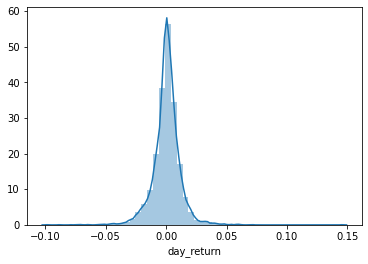

In [7]:
# print out daily return of the close adjusted price
sns.distplot(spy['day_return'])
print(spy['day_return'].agg(['mean','median','min','max','var', 'std']))

**DIA distribution**
- Normal-ish distribution. High Kurtosis we will measure. (normal distribution mean = 0 std = 1)
- Largest percent gain is 13.5% in one day
- Largest loss in a day is -9%
- Standard dev (volatility) is slightly larger than S&P500 probably due to less diversification


mean      0.000385
median    0.000649
min      -0.093947
max       0.135560
var       0.000132
std       0.011468
Name: day_return, dtype: float64


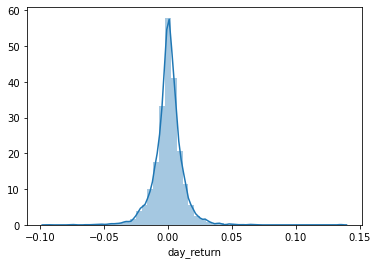

In [8]:
# show daily return
sns.distplot(dia['day_return'])
print(dia['day_return'].agg(['mean', 'median', 'min','max','var', 'std']))

### Day of the Week Return Analysis
Ever wondered what day of the week offers the best upside? Does it always feel like friday has the buy button engaged after lunch and everyone takes off? Lets check.

In [9]:
# Create weekday column and map corresponding number output to real name
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
spy['weekday'] = spy['Date'].dt.dayofweek.map(dayOfWeek)
dia['weekday'] = dia['Date'].dt.dayofweek.map(dayOfWeek)

spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_return,log_day_return,weekday
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.486324,480500,0.007112,0.007087,Monday
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.542448,201300,0.002119,0.002117,Tuesday
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.822998,529400,0.010570,0.010514,Wednesday
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.935240,531500,0.004185,0.004176,Thursday
5,1993-02-05,44.96875,45.06250,44.71875,44.96875,26.916538,492100,-0.000694,-0.000695,Friday


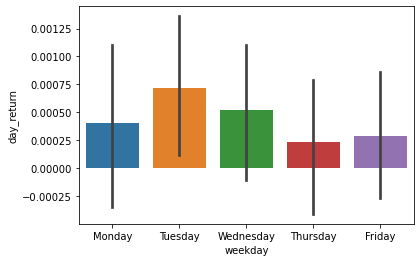

In [10]:
# Create SPY Barplot Showing 1 Day Return %
sns.barplot(x="weekday", y="day_return", data=spy)

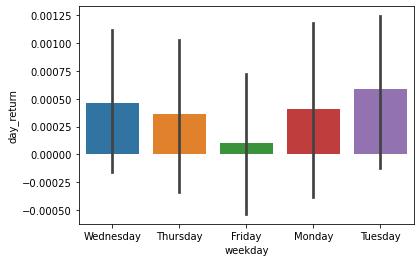

In [11]:
# Create DIA Barplot Showing 1 Day Return %
sns.barplot(x="weekday", y="day_return", data=dia)

#### Conclusions
The two ETFs appear to behave very differently when looking at the returns for which day of the week it is. The DIA seems to not really care what day it ism

- Spy: Very interesting finds here. The SPY's best day is overwhelmingly Tuesday. It is almost as if Tuesday does not go down. The error bars are completely positive. Monday is the most volatile

### Seasonal Trend Decmposition Plots

In [12]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style('darkgrid')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)


In [13]:
stl_spy = spy
stl_spy = stl_spy.set_index('Date')
stl_spy = stl_spy.resample('M').last()
stl_spy = stl_spy['Adj Close']

In [14]:
spy['Adj Close'].head()

1    26.486324
2    26.542448
3    26.822998
4    26.935240
5    26.916538
Name: Adj Close, dtype: float64

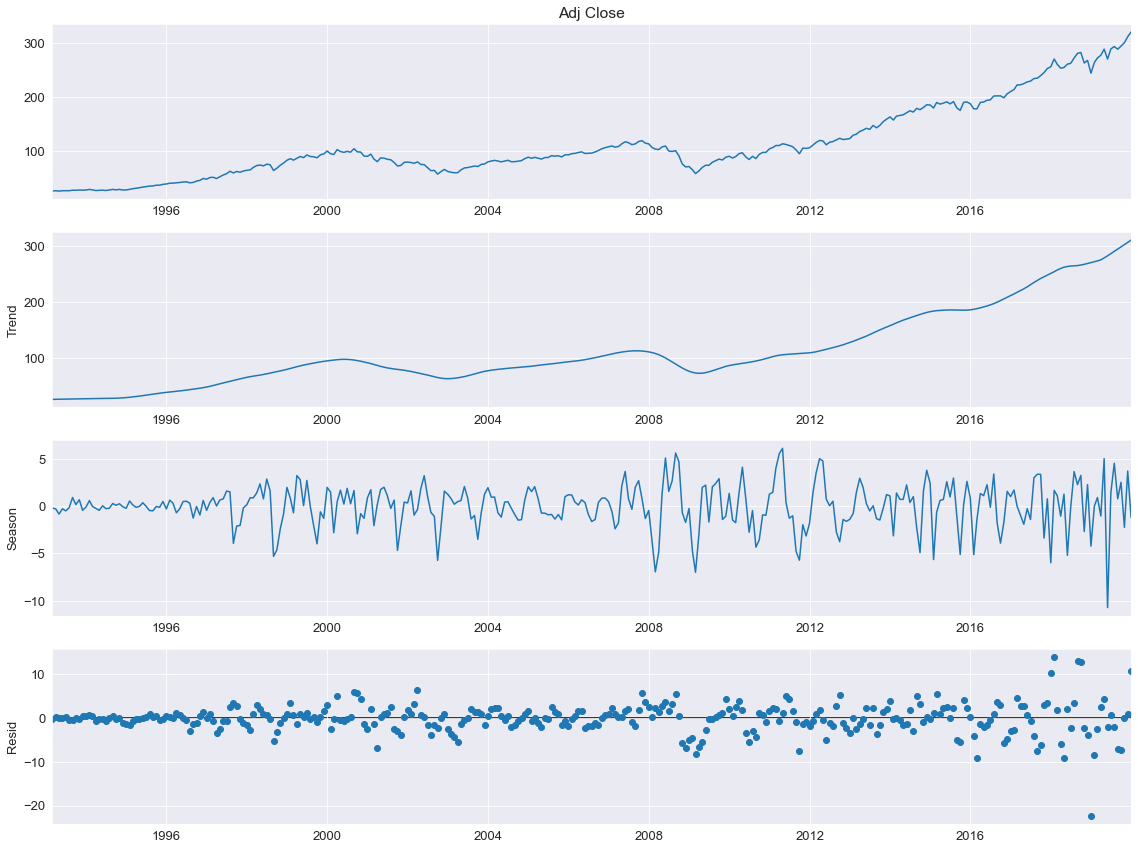

In [15]:
seasonal_trend_decomp_plot(dataframe = spy,
                           target_series = 'Adj Close',
                           freq = 'M',
                           seasonal_smoother = 5,
                           period = 12)

In [16]:
STL()

TypeError: __init__() takes at least 1 positional argument (0 given)

# ARIMA Model

## Autocorrelation

In [ ]:
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation for SPY
autocorrelation_plot(spy['Adj Close'])

In [ ]:
# Plot autocorrelation for DIA
autocorrelation_plot(dia['Adj Close'])

**Conlcusion**

- Seems to be positive until about 1750 day lag
- the earlier more recent the point the better the correlation
- No need to do anywhere the amount of lags we did. Need to focus earlier on

### Lets Test first 10 days

In [ ]:
# Establish empty list for for-loop
spy_autocorr = []

# Loop through lag numbers to find the point with highest autocorrelation
for x in list(range(1,101)):
    spy_autocorr.append(spy['Adj Close'].autocorr(lag=x))

# Show the index of the point with the largest autocorrelation value
# 0 indexed so add 1 for correct number of lags
lags = spy_autocorr.index(max(spy_autocorr)) + 1 
print('The best performing lag is number {}'.format(lags))

**Conclusion**

No need to do this for the DIA as well. This turned out exactly like our previous graph showed. An almost linear relationship with decreasing autocorrelation until around lag 2000. This means that the previous day is the best day to use to predict the next days price. However, with the average % change from the day before being almost 0, its not a very good indicator.

### Arima Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
spy_model = ARIMA(spy['Adj Close'], order=(5,1,0))
spy_model_fit = spy_model.fit(disp=0)
print(spy_model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(spy_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
cal

In [ ]:
spy['sma_3'] = spy.Close.rolling(window=3).mean()

In [ ]:
spy.head()